In [14]:
import requests
from bs4 import BeautifulSoup
import json
import matplotsoccer
import matplotlib.pyplot as plt

In [2]:
headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'uk,ru-RU;q=0.9,ru;q=0.8,en-US;q=0.7,en;q=0.6',
    'cache-control': 'max-age=0',
    'if-none-match': 'W/"9f784e861d"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
}
headers['If-Modified-Since'] = 'Mon, 1 Jan 2024 00:00:00 GMT'
response = requests.get('https://api.sofascore.com/api/v1/event/11369369/average-positions', headers=headers)

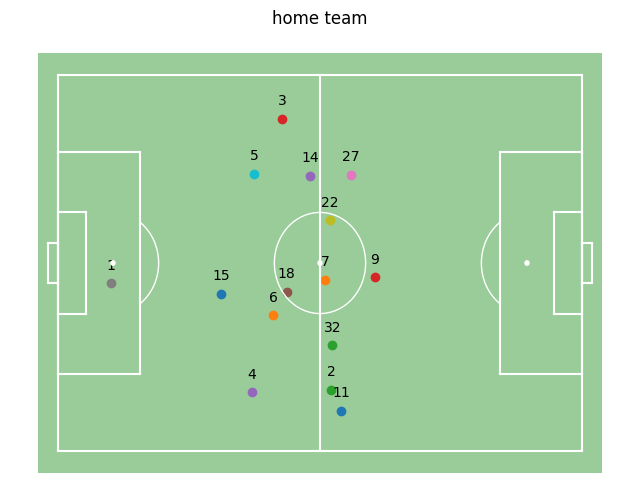

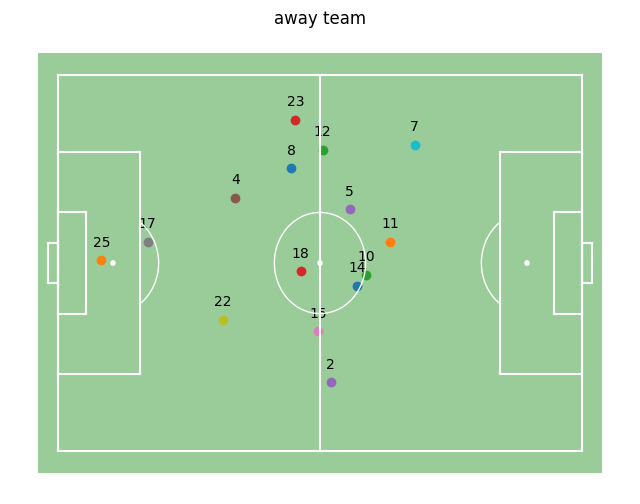

In [53]:
for team in response.json():
    if (team != 'substitutions'):
        matplotsoccer.field("green",figsize=8, show=False)
        plt.title(team + " team")
    for player in response.json()[team]:
        if 'averageX' in player:
            jersey_number = player['player']['jerseyNumber']
            x, y = player['averageY'], player['averageX']
            plt.scatter(y, x*0.7-2)
            plt.annotate(jersey_number, (y, x*0.7-2), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()